In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from helpers import sns_styleset
%matplotlib inline

In [2]:
sns_styleset()

In [3]:
total_numbers = np.array([[27, 22, 17, 10, 11, 7, 3],
                          [10, 10, 3, 8, 4, 6, 1],
                          [23, 22, 15, 15, 9, 8, 3],
                          [12, 9, 8, 8, 4, 5, 2],
                          [16, 10, 8, 10, 10, 2, 4],
                          [8, 8, 6, 5, 2, 5, 2]])


In [4]:
stats_df = pd.DataFrame(total_numbers, columns = ['bulbs_total', 'Grho', 'Grho_rot', 'SCGN', 'SCGN_rot', 'coloc', 'coloc_rot'])

In [5]:
stats_df['HC'] = ['HC1', 'HC7', 'HC5', 'HC9', 'HC10', 'HC8']

In [6]:
stats_df

,bulbs_total,Grho,Grho_rot,SCGN,SCGN_rot,coloc,coloc_rot,HC
0,27,22,17,10,11,7,3,HC1
1,10,10,3,8,4,6,1,HC7
2,23,22,15,15,9,8,3,HC5
3,12,9,8,8,4,5,2,HC9
4,16,10,8,10,10,2,4,HC10
5,8,8,6,5,2,5,2,HC8


In [7]:
stats_df_long = stats_df[stats_df.keys()[1:]].melt('HC')
stats_df_long['rotation'] = 'original'
for i in range(len(stats_df_long)):
    if stats_df_long.loc[i,'variable'] in ['Grho', 'Grho_rot']:
        stats_df_long.loc[i,'marker'] = 'GABARρ2'
    elif stats_df_long.loc[i,'variable'] in ['SCGN', 'SCGN_rot']:
        stats_df_long.loc[i,'marker'] = 'SCGN'
    elif stats_df_long.loc[i,'variable'] in ['coloc', 'coloc_rot']:
        stats_df_long.loc[i,'marker'] = 'SCGN+GABARρ2'
    if stats_df_long.loc[i,'variable'] in ['Grho_rot', 'SCGN_rot', 'coloc_rot']:
        stats_df_long.loc[i,'rotation'] = 'rotated'

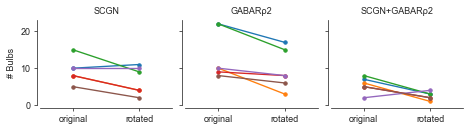

In [8]:
sns_styleset()
g = sns.catplot(x='rotation', y='value', col='marker', hue='HC',col_order=['SCGN', 'GABARρ2', 'SCGN+GABARρ2'], data=stats_df_long, kind='point',height=4.7/2.54, aspect=1.15, legend=False, dodge=False)
g.set_axis_labels("", "# Bulbs")
g.set_xticklabels(["original", "rotated"])
g.set_titles("{col_name}")
# g.set_titles(['SCGN', 'GABAR$\rho$', 'SCGN+GABAR$\rho$'])
sns.despine(offset=3)
# plt.savefig('./figures/Fig5E_bulb_colocalization.svg',bbox_inches='tight',dpi=300)
plt.show()

In [9]:
long_df_scgn = pd.DataFrame(columns=['bulb','HC','rotated','coloc'])
for HC in range(len(stats_df)):
    coloc = stats_df.loc[HC,'SCGN']
    for bulb in range(stats_df.loc[HC,'bulbs_total']):
        if bulb < coloc:
            long_df_scgn = long_df_scgn.append({'bulb':bulb, 'HC':HC, 'rotated':0, 'coloc':1}, ignore_index=True)
        else:
            long_df_scgn = long_df_scgn.append({'bulb':bulb, 'HC':HC, 'rotated':0, 'coloc':0}, ignore_index=True)
    coloc = stats_df.loc[HC,'SCGN_rot']
    for bulb in range(stats_df.loc[HC,'bulbs_total']):
        if bulb < coloc:
            long_df_scgn = long_df_scgn.append({'bulb':bulb, 'HC':HC, 'rotated':1, 'coloc':1}, ignore_index=True)
        else:
            long_df_scgn = long_df_scgn.append({'bulb':bulb, 'HC':HC, 'rotated':1, 'coloc':0}, ignore_index=True)

In [10]:
long_df_grho = pd.DataFrame(columns=['bulb','HC','rotated','coloc'])
for HC in range(len(stats_df)):
    coloc = stats_df.loc[HC,'Grho']
    for bulb in range(stats_df.loc[HC,'bulbs_total']):
        if bulb < coloc:
            long_df_grho = long_df_grho.append({'bulb':bulb, 'HC':HC, 'rotated':0, 'coloc':1}, ignore_index=True)
        else:
            long_df_grho = long_df_grho.append({'bulb':bulb, 'HC':HC, 'rotated':0, 'coloc':0}, ignore_index=True)
    coloc = stats_df.loc[HC,'Grho_rot']
    for bulb in range(stats_df.loc[HC,'bulbs_total']):
        if bulb < coloc:
            long_df_grho = long_df_grho.append({'bulb':bulb, 'HC':HC, 'rotated':1, 'coloc':1}, ignore_index=True)
        else:
            long_df_grho = long_df_grho.append({'bulb':bulb, 'HC':HC, 'rotated':1, 'coloc':0}, ignore_index=True)

In [11]:
long_df_coloc = pd.DataFrame(columns=['bulb','HC','rotated','coloc'])
for HC in range(len(stats_df)):
    coloc = stats_df.loc[HC,'coloc']
    for bulb in range(stats_df.loc[HC,'bulbs_total']):
        if bulb < coloc:
            long_df_coloc = long_df_coloc.append({'bulb':bulb, 'HC':HC, 'rotated':0, 'coloc':1}, ignore_index=True)
        else:
            long_df_coloc = long_df_coloc.append({'bulb':bulb, 'HC':HC, 'rotated':0, 'coloc':0}, ignore_index=True)
    coloc = stats_df.loc[HC,'coloc_rot']
    for bulb in range(stats_df.loc[HC,'bulbs_total']):
        if bulb < coloc:
            long_df_coloc = long_df_coloc.append({'bulb':bulb, 'HC':HC, 'rotated':1, 'coloc':1}, ignore_index=True)
        else:
            long_df_coloc = long_df_coloc.append({'bulb':bulb, 'HC':HC, 'rotated':1, 'coloc':0}, ignore_index=True)

## R models

In [12]:
%load_ext rpy2.ipython

In [13]:
import rpy2.robjects as ro
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.conversion import localconverter

pandas2ri.activate()

In [ ]:
#import r package
r_stats = importr('stats')
r_base = importr('base')
r_blme = importr('blme')

In [15]:
r_df_grho = ro.DataFrame({'bulb': ro.vectors.FactorVector(long_df_grho['bulb'].values.astype(str)),
                          'HC': ro.vectors.FactorVector(long_df_grho['HC'].values.astype(str)),
                          'rotated': ro.vectors.FactorVector(long_df_grho['rotated'].values.astype(str)),
                          'coloc': ro.vectors.IntVector(long_df_grho['coloc'].values)})

r_df_scgn = ro.DataFrame({'bulb': ro.vectors.FactorVector(long_df_scgn['bulb'].values.astype(str)),
                          'HC': ro.vectors.FactorVector(long_df_scgn['HC'].values.astype(str)),
                          'rotated': ro.vectors.FactorVector(long_df_scgn['rotated'].values.astype(str)),
                          'coloc': ro.vectors.IntVector(long_df_scgn['coloc'].values)})

r_df_coloc = ro.DataFrame({'bulb': ro.vectors.FactorVector(long_df_coloc['bulb'].values.astype(str)),
                           'HC': ro.vectors.FactorVector(long_df_coloc['HC'].values.astype(str)),
                           'rotated': ro.vectors.FactorVector(long_df_coloc['rotated'].values.astype(str)),
                           'coloc': ro.vectors.IntVector(long_df_coloc['coloc'].values)})

In [16]:
r_model_grho = r_blme.bglmer('coloc ~ rotated + (1|HC)',data=r_df_grho,family="binomial")
r_model_scgn = r_blme.bglmer('coloc ~ rotated + (1|HC)',data=r_df_scgn,family="binomial")
r_model_coloc = r_blme.bglmer('coloc ~ rotated + (1|HC)',data=r_df_coloc,family="binomial")

In [17]:
print(r_base.summary(r_model_grho))

Cov prior  : HC ~ wishart(df = 3.5, scale = Inf, posterior.scale = cov, common.scale = TRUE)
Prior dev  : 1.9124

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [bglmerMod]
 Family: binomial  ( logit )
Formula: coloc ~ rotated + (1 | HC)
   Data: structure(list(bulb = structure(c(1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L,  
14L, 15L, 16L, 17L, 18L, 19L, 20L, 1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L,  
14L, 15L, 16L, 17L, 18L, 19L, 20L, 1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L, 26L,  
27L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L, 26L, 27L, 3L, 4L,  
5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L, 14L, 15L, 16L, 1L, 2L, 13L,  
21L, 22L, 23L, 24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L,  
10L, 11L, 12L, 14L, 15L, 16L, 1L, 2L, 13L, 21L, 22L, 23L, 24L,  
25L, 26L, 27L, 3L, 4L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L,  
26L, 27

In [18]:
print(r_base.summary(r_model_scgn))

Cov prior  : HC ~ wishart(df = 3.5, scale = Inf, posterior.scale = cov, common.scale = TRUE)
Prior dev  : 2.9653

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [bglmerMod]
 Family: binomial  ( logit )
Formula: coloc ~ rotated + (1 | HC)
   Data: structure(list(bulb = structure(c(1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L,  
14L, 15L, 16L, 17L, 18L, 19L, 20L, 1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L,  
14L, 15L, 16L, 17L, 18L, 19L, 20L, 1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L, 26L,  
27L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L, 26L, 27L, 3L, 4L,  
5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L, 14L, 15L, 16L, 1L, 2L, 13L,  
21L, 22L, 23L, 24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L,  
10L, 11L, 12L, 14L, 15L, 16L, 1L, 2L, 13L, 21L, 22L, 23L, 24L,  
25L, 26L, 27L, 3L, 4L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L,  
26L, 27

In [19]:
print(r_base.summary(r_model_coloc))

Cov prior  : HC ~ wishart(df = 3.5, scale = Inf, posterior.scale = cov, common.scale = TRUE)
Prior dev  : 2.4608

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [bglmerMod]
 Family: binomial  ( logit )
Formula: coloc ~ rotated + (1 | HC)
   Data: structure(list(bulb = structure(c(1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L,  
14L, 15L, 16L, 17L, 18L, 19L, 20L, 1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L,  
14L, 15L, 16L, 17L, 18L, 19L, 20L, 1L, 2L, 13L, 21L, 22L, 23L,  
24L, 25L, 26L, 27L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L, 26L,  
27L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L, 26L, 27L, 3L, 4L,  
5L, 6L, 7L, 8L, 9L, 10L, 11L, 12L, 14L, 15L, 16L, 1L, 2L, 13L,  
21L, 22L, 23L, 24L, 25L, 26L, 27L, 3L, 4L, 5L, 6L, 7L, 8L, 9L,  
10L, 11L, 12L, 14L, 15L, 16L, 1L, 2L, 13L, 21L, 22L, 23L, 24L,  
25L, 26L, 27L, 3L, 4L, 1L, 2L, 13L, 21L, 22L, 23L, 24L, 25L,  
26L, 27